In [1]:
############# Updated on 25/11/2020
import pandas as pd
import numpy as np
import tensorflow as tf
import keras.backend as K

/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/ten

In [2]:
df_train = pd.read_csv('news_set/train.csv')  #[date, title,abstract,article]
df_valid = pd.read_csv("news_set/validate.csv")
df_test = pd.read_csv("news_set/test.csv")

In [3]:
s_train = df_train['title'].values
s_valid = df_valid['title'].values
s_test = df_test['title'].values

In [4]:
s_train.shape,s_valid.shape,s_test.shape

((46136,), (13284,), (12398,))

In [5]:
s = np.r_[s_train,s_valid,s_test]
s.shape

(71818,)

In [6]:
pd.Series(s).describe()

count                                                 71818
unique                                                71818
top       aig in talk for complete government exit ceo s...
freq                                                      1
dtype: object

In [2]:
#x_train = pd.read_csv('news_set/train.csv').set_index('date')
#x_train = x_train['title'].groupby(x_train.index).apply(list).apply(pd.Series).fillna('')
#label = pd.read_csv('price_set/train(1020)_label.csv').set_index('Date')


In [3]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
date,,,,,,,,,,,,,,,,,,,,,
2006-10-20,exxon mobil offer plan to end alaska dispute .,,,,,,,,,,...,,,,,,,,,,
2006-10-23,royal dutch bid for shell canada low sharehold...,dow end at record high texas instrument off la...,shell look to buy out canada unit for c xxx bi...,ford be review all product brand ceo .,at t earnings beat expectation .,australia foster say confident on target .,ford win t sell ford credit .,kimberly clark see high cost this year .,,,...,,,,,,,,,,
2006-10-24,microsoft to start vista coupon plan for pc bu...,dst system post low q3 net profit .,u . s . tech stock fall on texas instrument ou...,ge wal mart shenzhen bank tie up on china cred...,lockheed martin ups forecast .,microsoft to defer xxx billion in sale to thir...,jim cramer bare escentuals allergan medicis av...,pepsico look to new product acquisition .,amazon profit beat expectation .,phelps dodge net double but off wall st . targ...,...,,,,,,,,,,
2006-10-25,boeing profit tops view but forecast disappoin...,u . s . stock gain exxon and altria jump .,amazon profit beat forecast .,honda q2 drop on finance loss yen lift f cast .,exist home sale fall for 6th straight month .,radioshack post quarter loss a cost rise .,altria net hit by spain conwood lifts reynolds .,stock see up slightly after amazon result .,altria promise january detail for kraft .,gm signal it be closer to labor deal with delp...,...,,,,,,,,,,
2006-10-26,analyst sound note of caution on gm cash burn .,comcast third quarter profit up on record sub ...,microsoft profit rise 11 percent .,instant view 4 microsoft post high result .,dow chemical earnings rise on strong sale .,stock gain on strong profit microsoft up late .,microsoft cfo say tender offer lower outlook .,exxon post huge profit on high price output .,gm post profit but recovery loom .,u . s . sept new home sale durables rise .,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-17,u . k . home seller push ask price to record r...,end u . s . student loan don t make them cheap .,third fed stimulus win t be good than qe2 romn...,iran nuclear offer isn t enough to delay eu oi...,rwe win t build more nuclear power station sue...,supreme court s super monday don t serve justi...,new index show low growth for major economy .,microsoft nears deal to buy yammer source .,exxon drop shale exploration plan in poland pa...,irish asset sale win t be impact by euro crisi...,...,,,,,,,,,,
2012-06-18,dollar shortage see in 2 trillion gap say morg...,microsoft tablet must shed office image to cha...,ups sell xxx million yuan commercial paper for...,kenya coffee auction recess start on july 18 a...,morgan stanley may settle nuns u . k . bond la...,blackrock s rice to stop co manage five energy...,wto china steel facebook sec gupta verdict com...,pfizer s drug for rare nerve disease reject by...,tui see no jump in cost of travel to greece ce...,gm say to report xxxth facility go landfill fr...,...,,,,,,,,,,
2012-06-19,wal mart mom tear on health care become campai...,pemex sell xxx billion of bond abroad amid rec...,danone cut profitability goal on southern euro...,sumitomo mitsui trust target 32 increase in ov...,metlife win feed extension to resubmit capital...,kodak sue apple in bid to quash claim over pat...,microsoft unveils surface tablet computer to r...,deutsche bahn see eu20 million airport delay c...,u . s . soybean stock see low a shipment stren...,nestle shrug off low spain demand a danone cut...,...,,,,,,,,,,


In [4]:
x_train.shape, label.shape

((1976, 132), (1428, 1))

In [7]:
from keras.preprocessing import text,sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [8]:
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
sess = tf.Session(graph = tf.get_default_graph())
K.set_session(sess)

In [9]:
tokenizer = Tokenizer(lower = True,filters='\n\t')
tokenizer.fit_on_texts(s)

In [10]:
#######################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@Vocabulary size
vocab_size = len(tokenizer.word_index)+1
print('vocabulary size:{}'.format(vocab_size))  #vocabulary size:23364

vocabulary size:23364


In [ ]:
#processing the vocab cases for title
#before dropping the words that occurs less than 5 times 23383
#Dict size 7283

In [32]:
x_train= tokenizer.texts_to_sequences(s_train)
x_valid= tokenizer.texts_to_sequences(s_valid)
x_test= tokenizer.texts_to_sequences(s_test)
x_all = tokenizer.texts_to_sequences(s)

In [88]:
word_num_train = [] #word_num in each sentence
word_num_valid = [] 
word_num_test = [] 
word_num_all = []   #word_num_all与其他不一样

for i in range(len(x_train)):
    word_num_train.append(len(x_train[i]))
#word_num 
for i in range(len(x_valid)):
    word_num_valid.append(len(x_valid[i]))

for i in range(len(x_test)):
    word_num_test.append(len(x_test[i]))

for i in range(len(x_all)):
    word_num_all.append(len(x_all[i]))



len(word_num_train),len(word_num_valid),len(word_num_test),len(word_num_all)

(46136, 13284, 12398, 71818)

In [13]:
x_train[0],s_train[0],len(x_train[0])

([145, 976, 136, 51, 2, 117, 2259, 632, 1],
 'exxon mobil offer plan to end alaska dispute .',
 9)

In [15]:
############################################################################## Training set, Validation set, Test set statistics
#word_num_train  #training set里面每个sentence的句子长度

In [16]:
pd.Series(word_num_train).describe()

count    46136.000000
mean        11.171992
std          2.370204
min          4.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         22.000000
dtype: float64

In [17]:
pd.Series(word_num_valid).describe()

count    13284.000000
mean        11.123908
std          1.829107
min          4.000000
25%         10.000000
50%         11.000000
75%         12.000000
max         19.000000
dtype: float64

In [18]:
pd.Series(word_num_test).describe()

count    12398.000000
mean        11.221891
std          1.880485
min          5.000000
25%         10.000000
50%         11.000000
75%         12.000000
max         19.000000
dtype: float64

In [89]:
pd.Series(word_num_all).describe()

count    71818.000000
mean        11.171712
std          2.199766
min          4.000000
25%         10.000000
50%         11.000000
75%         13.000000
max         22.000000
dtype: float64

In [24]:
word_num_all = []
s_list = list(s)
for i in range(len(s_list)):
    word_num_all.append(len(s_list[i]))

pd.Series(word_num_all).describe()

count    71818.000000
mean        57.011070
std          9.193571
min         18.000000
25%         51.000000
50%         57.000000
75%         63.000000
max         92.000000
dtype: float64

In [36]:
#x_all

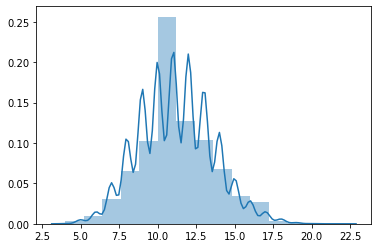

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(word_num_train, bins=15)
plt.show()

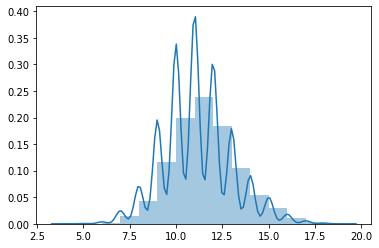

In [126]:
sns.distplot(word_num_valid, bins=15)
plt.show()

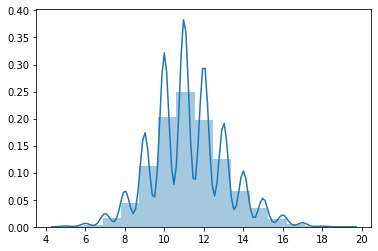

In [122]:
sns.distplot(word_num_test, bins=15)
plt.show()

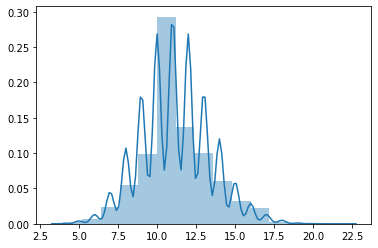

In [123]:
sns.distplot(word_num_all, bins=15)
plt.show()

In [94]:
word_num_train.index(max(word_num_train))
s_train[27412],x_train[27412],word_num_train[27412]

('u . s . yield be two basis point from the month s low on u . s . growth outlook .',
 [12,
  1,
  3,
  1,
  65,
  33,
  74,
  1846,
  706,
  36,
  82,
  22,
  3,
  4,
  7,
  12,
  1,
  3,
  1,
  71,
  133,
  1],
 22)

In [95]:
word_num_valid[1978],word_num_all[48114]

(15, 15)

In [96]:
word_num_valid.index(max(word_num_valid))
s_valid[3712],x_valid[3712],word_num_valid[3712]

('u . k . stock drop to one month low on u . s . data rio fall .',
 [12, 1, 110, 1, 43, 32, 2, 112, 22, 4, 7, 12, 1, 3, 1, 179, 968, 19, 1],
 19)

In [97]:
word_num_test.index(max(word_num_test))
s_test[1375],x_test[1375],word_num_test[1375]

('ecclestone say allege u . s . dollar f 1 bribe not under u . s . law .',
 [3672,
  5,
  2570,
  12,
  1,
  3,
  1,
  76,
  123,
  137,
  3049,
  196,
  625,
  12,
  1,
  3,
  1,
  431,
  1],
 19)

In [106]:
word_num_all.index(max(word_num_all))
s[48114],x_all[48114],word_num_all[48114],len(s[48114])######### word_num_all 不等于 s

('samsung sell xxx million smartphones in second quarter almost twice what apple sell report .',
 [214, 60, 9, 45, 1985, 6, 178, 78, 644, 3941, 803, 25, 60, 38, 1],
 15,
 92)

In [100]:
#a = tokenizer.texts_to_sequences(s[48114])
#for i in range(len(a)):
#    print(a[i])
#    print(s[48114][i])

In [101]:
maxlen1 = len(max((s for s in np.r_[s_train,s_valid,s_test]),key =len))
print('maxlen_titles:{}'.format(maxlen1)) #92

maxlen_titles:92


In [104]:
word_num_all.index(max(word_num_all))
s[48114],x_all[48114],len(s[48114])

('samsung sell xxx million smartphones in second quarter almost twice what apple sell report .',
 [214, 60, 9, 45, 1985, 6, 178, 78, 644, 3941, 803, 25, 60, 38, 1],
 92)

In [103]:
maxlen = len(max((s for s in s_train),key =len))
maxlen

82

In [49]:
word_num_train.index(max(word_num_train))
s_train[27412],x_train[27412],len(s_train[27412])

('u . s . yield be two basis point from the month s low on u . s . growth outlook .',
 [12,
  1,
  3,
  1,
  65,
  33,
  74,
  1846,
  706,
  36,
  82,
  22,
  3,
  4,
  7,
  12,
  1,
  3,
  1,
  71,
  133,
  1],
 81)

In [53]:
maxlen2 = len(max((s for s in s_valid),key =len))
maxlen2

92

In [55]:
word_num_valid.index(max(word_num_valid))
s_valid[3712],x_valid[3712],len(s_valid[3712])

('u . k . stock drop to one month low on u . s . data rio fall .',
 [12, 1, 110, 1, 43, 32, 2, 112, 22, 4, 7, 12, 1, 3, 1, 179, 968, 19, 1],
 62)

In [58]:
maxlen3 = len(max((s for s in s_test),key =len))
maxlen3

85

In [60]:
word_num_test.index(max(word_num_test))
s_test[1375],x_test[1375],len(s_test[1375])

('ecclestone say allege u . s . dollar f 1 bribe not under u . s . law .',
 [3672,
  5,
  2570,
  12,
  1,
  3,
  1,
  76,
  123,
  137,
  3049,
  196,
  625,
  12,
  1,
  3,
  1,
  431,
  1],
 70)